# Import

In [1]:
import pandas as pd
from psaw import PushshiftAPI
import datetime as dt
from tqdm import tqdm
import numpy as np
import warnings
import analysis_util
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr

# Data

In [9]:
df=pd.read_csv('/home/pelle/Master_Thesis/data/processed/community_metrics.csv').sort_values('number_of_nodes',ascending=False)

In [3]:
# rho = df.corr()
# pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
# p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))

# fig, ax = plt.subplots(figsize=(14,14))

# sns.heatmap(data=rho, annot=(np.array(rho.round(2).astype(str) + p)),fmt = '',vmin=-1,vmax=1,cmap='coolwarm')

# # rotate xticks
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
# plt.show()

In [5]:
# start = df_comments.created_utc.min()
# period = df_comments.created_utc.max()-df_comments.created_utc.min()
# step = dt.timedelta(weeks=10)

# graph_dict = {}

# for i in tqdm(range(int(np.ceil(period / step)))):
#     before = start + step*i + step
#     # df_comments_before=df_comments.loc[df_comments.created_utc<before]
    
#     # G = nx.Graph()
#     # G.add_edges_from(df_comments_before[['author','parent_author']].dropna().values)
#     # # save graph as pickle to /home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs
#     # nx.write_gpickle(G, '/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/{}.gpickle'.format(before))

100%|██████████| 1/1 [00:00<00:00, 2741.38it/s]


In [11]:
# sample data to get dtypes
sample = pd.read_csv('/home/pelle/Downloads/comments_pmaw_2016-2021_wsb.csv',nrows=100)
dtypes = sample.dtypes # Get the dtypes
cols = sample.columns # Get the columns
dtype_dictionary = {} 
for c in cols:
    if str(dtypes[c]) == 'int64':
        dtype_dictionary[c] = 'float32' # Handle NANs in int columns
    else:
        dtype_dictionary[c] = str(dtypes[c])
dtype_dictionary['author'] = 'str'
dtype_dictionary['body'] = 'str'
dtype_dictionary['parent_id'] = 'str'
dtype_dictionary['link_id'] = 'str'
dtype_dictionary['id'] = 'str'


# read data
print('Reading data...')
df_comments_chunked = pd.read_csv('/home/pelle/Downloads/comments_pmaw_2016-2021_wsb.csv', dtype=dtype_dictionary, 
                 keep_default_na=False, 
                 error_bad_lines=False,
                 na_values=['na',''],
                 usecols=['author','parent_author','created_utc','score'],chunksize=1000000,nrows=10000)

df_comments = pd.concat(df_comments_chunked, ignore_index=True)
df_comments.created_utc = pd.to_datetime(df_comments.created_utc,unit='s')
print('Done reading!'+'\n')

df_posts = pd.read_csv('/home/pelle/Downloads/submissions_pmaw_2016-2021_wsb.csv',nrows=100)

Reading data...
Done reading!



/tmp/ipykernel_3006/251551527.py:20: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_comments_chunked = pd.read_csv('/home/pelle/Downloads/comments_pmaw_2016-2021_wsb.csv', dtype=dtype_dictionary,


In [12]:
df_authors=pd.concat([df_posts[['author','score']],df_comments[['author','score']]])
s=df_authors.groupby('author').sum().rename(columns={'score':'sum_score'})
m=df_authors.groupby('author').mean().rename(columns={'score':'mean_score'})
df_score=s.join(m)

In [21]:
df_score.loc[next(iter(G.nodes())),'sum_score']

1946.0

In [10]:
import pandas as pd
import datetime as dt
df_posts = pd.read_csv('/home/pelle/Downloads/submissions_pmaw_2016-2021_wsb.csv')
df_posts.created_utc = pd.to_datetime(df_posts.created_utc,unit='s')
before = df_posts.created_utc.max()-dt.timedelta(weeks=10)
df_posts_period = df_posts[(df_posts.created_utc < before)]

In [17]:
import pickle 

p = '/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_10/graph_2017-07-14.gpickle'

with open(p, 'rb') as handle:
    G = pickle.load(handle)

In [5]:
# add attributes to nodes
for node in G.nodes():  
    G.nodes[node]['sum_score'] = df_score.loc[node].sum_score
    G.nodes[node]['mean_score'] = df_score.loc[node].mean_score

In [18]:
next(iter(G.nodes()))

'theycallme1'

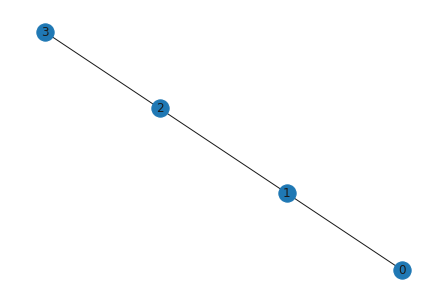

In [14]:
# G = nx.path_graph(4)
# nx.write_gpickle(G, "test.gpickle")
# nx.draw(G, with_labels=True)

In [17]:
# G = nx.random_geometric_graph(200, 0.125)
# nx.write_gpickle(G, "test.gpickle")
# G=nx.read_gpickle("test.gpickle")
# nx.draw(G, with_labels=True)